## Machine Learning and Data Science Project

#### Students:  
m20190784 - **Benedita Pinto Nunes**    
m20191416 - **Diogo Rodrigues Silva**                      
m20191429 - **Miguel Sena e Silva**                

#### Database  
***Group33_LaGoste_Campaign.xlsx*** 

retrieved from  
http://elearning.novaims.unl.pt/moodle/pluginfile.php?file=%2F62270%2Fmod_folder%2Fcontent%2F0%2F201920_Group_Datasets.zip&forcedownload=1  

at 2020/04/01.

#### 0. Imports for this project

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date 

#### 1. Obtaining and pre-processing data

In [39]:
# Obtaining and understanding data
g33 = pd.read_excel(r'Group33_LaGoste_Campaign.xlsx', index_col=0)
g33.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar
Custid,,,,,,,,,,,,,,,,,,,,,
50004110,1975,PhD,Together,90888.0,0,0,2017-04-17,6,85,3,...,0,1,0,0,0,0,0,0,0,0
50004118,1968,Master,Married,84214.0,0,1,2016-07-21,10,532,132,...,5,14,5,0,0,0,0,0,0,0
50004130,1980,Graduation,Married,62537.0,1,1,2015-12-07,73,244,36,...,4,7,7,0,0,0,0,0,0,0
50004142,1976,Basic,Divorced,21462.0,1,0,2015-12-18,53,3,15,...,2,4,7,0,0,0,0,0,0,0
50004146,1985,Master,Together,87743.0,0,0,2017-03-07,93,286,185,...,5,6,1,0,0,0,0,0,0,0


In [40]:
# Column cleanup - all lower letters
print('Prior colunm names: \n',g33.columns)
print()
g33.columns = [col.lower() for col in g33]
print('Current colunm names: \n',g33.columns)
# variables in lower letters too
g33 = g33.applymap(lambda x: x if type(x)!=str else x.lower())

Prior colunm names: 
 Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntSneakers', 'MntTShirts',
       'MntRackets', 'MntWatches', 'MntHats', 'MntPremium_Brand',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain', 'DepVar'],
      dtype='object')

Current colunm names: 
 Index(['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntsneakers', 'mnttshirts',
       'mntrackets', 'mntwatches', 'mnthats', 'mntpremium_brand',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp2',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'complain', 'depvar'],
      dtype='object')


In [41]:
print('Info for g33:\n')
g33.info()

Info for g33:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 50004110 to 50044102
Data columns (total 26 columns):
year_birth             2500 non-null int64
education              2500 non-null object
marital_status         2500 non-null object
income                 2475 non-null float64
kidhome                2500 non-null int64
teenhome               2500 non-null int64
dt_customer            2500 non-null datetime64[ns]
recency                2500 non-null int64
mntsneakers            2500 non-null int64
mnttshirts             2500 non-null int64
mntrackets             2500 non-null int64
mntwatches             2500 non-null int64
mnthats                2453 non-null float64
mntpremium_brand       2458 non-null float64
numdealspurchases      2500 non-null int64
numwebpurchases        2500 non-null int64
numcatalogpurchases    2500 non-null int64
numstorepurchases      2500 non-null int64
numwebvisitsmonth      2500 non-null int64
acceptedcmp2           2500 non-n

In [42]:
# look for duplicate data
print('Prior shape:\n',g33.shape)
print()
g33.drop_duplicates(inplace= True)
print('Current shape:\n',g33.shape) 

print('\nno duplicates found...')

Prior shape:
 (2500, 26)

Current shape:
 (2500, 26)

no duplicates found...


##### Dealing with NaN

In [43]:
# look for missing values
print('Columns with missing values:\n',g33.columns[g33.isnull().any()])
g33.isnull().sum()

Columns with missing values:
 Index(['income', 'mnthats', 'mntpremium_brand'], dtype='object')


year_birth              0
education               0
marital_status          0
income                 25
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntsneakers             0
mnttshirts              0
mntrackets              0
mntwatches              0
mnthats                47
mntpremium_brand       42
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp2            0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
complain                0
depvar                  0
dtype: int64

Dealing with "income" NaNs by referring to median wages by education category

In [44]:
# parsing income by education category
pv_inc2edu = g33[['income', 'education']].groupby(['education'])
pv_inc2edu.describe()

income                                                         \
             count          mean           std     min       25%      50%   
education                                                                   
2n cycle     437.0  62090.132723  25053.341093  4063.0  41788.00  63414.0   
basic        316.0  50429.746835  30455.854111  4933.0  26131.50  42973.0   
graduation  1229.0  64649.281530  26040.481159  1231.0  44596.00  63816.0   
master       325.0  67176.141538  24973.640873  6244.0  47562.00  66406.0   
phd          168.0  69505.339286  25771.604658  5643.0  48480.75  68710.0   

                                
                 75%       max  
education                       
2n cycle    81531.00  123230.0  
basic       73912.00  171472.0  
graduation  84618.00  163153.0  
master      86363.00  150997.0  
phd         89612.25  139909.0

In [45]:
# Defining median income by education category
_income = pv_inc2edu.apply(np.nanmedian).astype(int)
_income

education
2n cycle      63414
basic         42973
graduation    63816
master        66406
phd           68710
dtype: int32

In [46]:
# replacing income NaNs with median income by education category
# merging median income on rows with NaN income
nan_income = g33[g33['income'].isnull()].merge(_income.rename('edu_median'),
                                               left_on = 'education',
                                               right_index = True)
# replacing NaN
nan_income['income'] = nan_income['edu_median']
# drop 'edu_median' column
nan_income.drop('edu_median', axis=1, inplace= True)  
# replace income's NaN rows with edited rows
g33 = pd.concat([g33[g33['income'].notnull()],nan_income])

Dealing with "mnthats" NaNs

The vast majority doesn't spend money on hats.


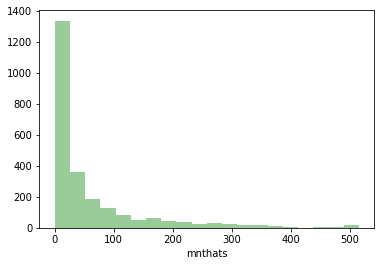

In [47]:
# understanding mnthats - "Amount spent on Hats"
sns.distplot(a = g33['mnthats'],kde = False, color="g", bins = 20);
print('The vast majority doesn\'t spend money on hats.')

In [48]:
print('No strong relation between spending amounts found.')
g33_spent = g33[['mntsneakers', 'mnttshirts', 'mntrackets', 
                 'mntwatches', 'mnthats', 'mntpremium_brand']]
g33_spent.corr()

No strong relation between spending amounts found.


,mntsneakers,mnttshirts,mntrackets,mntwatches,mnthats,mntpremium_brand
mntsneakers,1.000000,0.451350,0.648474,0.435908,0.318082,0.271033
mnttshirts,0.451350,1.000000,0.575968,0.577653,0.445122,0.282099
mntrackets,0.648474,0.575968,1.000000,0.606484,0.465732,0.280117
mntwatches,0.435908,0.577653,0.606484,1.000000,0.451596,0.282672
mnthats,0.318082,0.445122,0.465732,0.451596,1.000000,0.443106
mntpremium_brand,0.271033,0.282099,0.280117,0.282672,0.443106,1.000000


In [49]:
# => replacing mnthats' NaN with 0
g33['mnthats'].fillna(0, inplace = True)

Dealing with "mntpremium_brand" NaNs

The vast majority doesn't spend money on premium material.


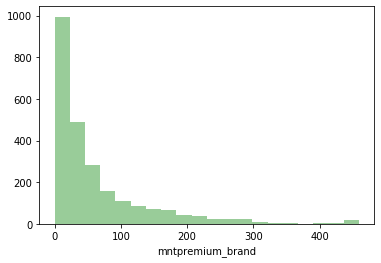

In [50]:
# understanding mntpremium_brand - "Amount spent on premium material"
sns.distplot(a = g33['mntpremium_brand'], kde = False, color="g", bins = 20);
print('The vast majority doesn\'t spend money on premium material.')

In [51]:
# => replacing NaN with 0
g33['mntpremium_brand'].fillna(0, inplace = True)

In [52]:
# look for missing values
print('Columns with missing values:\n',g33.columns[g33.isnull().any()])
print('No missing values.')

Columns with missing values:
 Index([], dtype='object')
No missing values.


#### Exploratory Data Analysis

In [60]:
# Some preliminary transformations
g33['age'] = date.today().year - g33['year_birth']
g33['dependents'] = g33['kidhome'] + g33['teenhome']
g33['marital_status'].replace('together','married', inplace = True) 
g33.describe()

,year_birth,income,kidhome,teenhome,recency,mntsneakers,mnttshirts,mntrackets,mntwatches,mnthats,...,numwebvisitsmonth,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,complain,depvar,age,dependents
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1971.678400,63032.769200,0.455200,0.499600,49.630000,297.068400,39.430000,253.630400,24.434800,58.066400,...,5.25960,0.084000,0.062000,0.090400,0.066800,0.011200,0.013200,0.124400,48.321600,0.954800
std,11.848001,26683.235726,0.541951,0.541588,29.153323,330.496122,58.628771,330.887289,35.885786,92.446757,...,2.51546,0.277443,0.241204,0.286811,0.249725,0.105257,0.114153,0.330103,11.848001,0.753249
min,1944.000000,1231.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1962.000000,42662.250000,0.000000,0.000000,24.000000,23.750000,3.000000,24.000000,2.000000,2.000000,...,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000
50%,1973.000000,62662.500000,0.000000,0.000000,50.000000,167.000000,12.000000,95.000000,8.000000,18.000000,...,6.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000
75%,1981.000000,83183.750000,1.000000,1.000000,75.250000,490.000000,49.250000,362.250000,30.000000,68.000000,...,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,1.000000
max,1999.000000,171472.000000,2.000000,2.000000,99.000000,1493.000000,299.000000,1481.000000,180.000000,516.000000,...,18.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.000000,4.000000


In [61]:
g33.describe(include = ['O'])

,education,marital_status
count,2500,2500
unique,5,4
top,graduation,married
freq,1244,1647


In [62]:
g33_dems = g33[['education','marital_status','dependents','kidhome','teenhome','age']]
g33_dems.head()

,education,marital_status,dependents,kidhome,teenhome,age
Custid,,,,,,
50004110,phd,married,0,0,0,45
50004118,master,married,1,0,1,52
50004130,graduation,married,2,1,1,40
50004142,basic,divorced,1,1,0,44
50004146,master,married,0,0,0,35


In [56]:
g33['education'].value_counts()

graduation    1244
2n cycle       439
master         328
basic          319
phd            170
Name: education, dtype: int64

In [57]:
g33['marital_status'].value_counts()

married     992
together    655
single      539
divorced    247
widow        67
Name: marital_status, dtype: int64

In [58]:
g33['kidhome'].value_counts()


0    1419
1    1024
2      57
Name: kidhome, dtype: int64

In [59]:
g33['teenhome'].value_counts()

0    1305
1    1141
2      54
Name: teenhome, dtype: int64